# Assignment

Use the "from the expert" (FTE) jupyter notebook as a starter for this assignment, and ask your instructor questions if you need help.

Use the `churn_data.csv` file to carry out a similar EDA and visualization process as what we did in the FTE. Create at least 2 EDA plots, and create a HTML file with an auto-EDA analysis using pandas-profiling or another auto-EDA Python package. Write a short analysis at the end of the assignment in markdown. 

## Data science process steps this week
We will carry out the first two parts of the CRISP-DM data science process this week:

1. Business understanding

This is customer churn data for a telecommunications company. Customers can have phone as well as other services. The company is looking to reduce customer churn, where customers stop using the company's services and cancel their account. The 'Churn' column has a binary target, yes or no, that denotes if a customer churned. We want to create a machine learning model to predict the Churn target using the other available data in the dataset. Ideally, we will deploy this model to integrate with the company's database, so that a churn risk column is created for each customer. This will enable customer service reps and others to devise and use strategies to reduce churn.


2. Data understanding

Carry out some EDA as we did in the FTE, such as using pandas-profiling. Create a histogram like we did in the FTE, where we plot a numeric column with the target as the 'hue'. Optional challenge: create other plots with the target as the hue, such as bar plots for the categorical columns.

In [1]:
%pip install pandas sweetviz matplotlib openpyxl seaborn phik plotly numpy jupyter ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tqdm as notebook_tqdm
import numpy as np
import pandas as pd
import sweetviz as sv
import phik
import seaborn as sns
import plotly
import plotly.express as px

In [3]:
#Read the CSV file "churn_data.csv" into a data frame...
df = pd.read_csv("./data/churn_data.csv")
df

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,Yes,One year,Mailed check,84.80,1990.50,No
7039,2234-XADUH,72,Yes,One year,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,11,No,Month-to-month,Electronic check,29.60,346.45,No
7041,8361-LTMKD,4,Yes,Month-to-month,Mailed check,74.40,306.60,Yes


In [4]:
# Auto-EDA with Sweetviz....
report = sv.analyze(df)
report.show_html('./data/churn_eda_sweetviz.html')

                                             |      | [  0%]   00:00 -> (? left)

Report ./data/churn_eda_sweetviz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [5]:
import plotly.io as pio
pio.renderers.default = 'notebook'

In [12]:
# Figure 1: A histogram showing the distribution of tenure, grouped by Churn
fig = px.histogram( data_frame=df, x="tenure",facet_col="Churn" )
fig.show(renderer="iframe")

<Axes: xlabel='tenure', ylabel='count'>

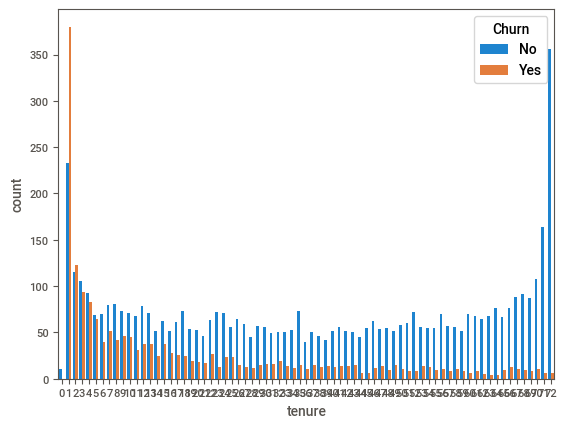

In [7]:
# Figure 2: A Seaborn countplot with "Churn" as the hue
sns.countplot(data=df,x="tenure", hue="Churn", )

In [8]:
# Figure 3: A histogram of those customers who have not canceled, showing distribution of tenure grouped by Contract
px.histogram( data_frame=df.query("Churn == 'Yes'"), x="tenure",facet_col="Contract" )

In [9]:
# Figure 4: A histogram of those customers who have not canceled, showing distribution of tenure grouped by Contract
fig = px.histogram( data_frame=df.query("Churn == 'No'"), x="tenure",facet_col="Contract" )
fig.show()

In [10]:
# Figure 5: A scatterplot showing the correlation between tenure and TotalCharges, and what that might tell us about Churn
px.scatter(data_frame=df.query("Churn == 'Yes'"), x="tenure",y="MonthlyCharges",color="Churn")

In [11]:
# Figure 6: A heatmap showing MonthlyCharges vs. tenure
px.density_heatmap(data_frame=df, x="MonthlyCharges",y="tenure",facet_col="Churn")

# Analysis

Fig. 1 shows the distribution of tenure grouped by churn. We can see that customers are most likely to cancel early in their tenure.

Fig. 2 expands on that analysis, showing in more detail that after 5 months, customers are increasingly less likely to cancel.  It might suggest that the best opportunities to mitigate churn are early in the relationship with a customer.

Figures 3 and 4 suggest that customers are more likely to remain if converted to a one-year or two-year contract. This may be common sense, but the data shows it.

Figures 5 and 6 explores the relationship between tenure and MonthlyCharges. It shows that cost may be a factor in making the decision to cancel, but the correlation isn't definitive, especially in those early months. The visualizations may simply be a reflection that the median monthly charge is $70 (shown in the accompanying PDF file)